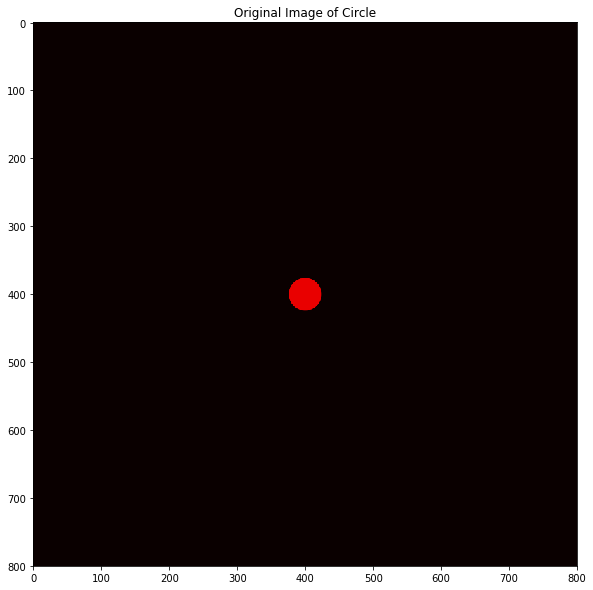

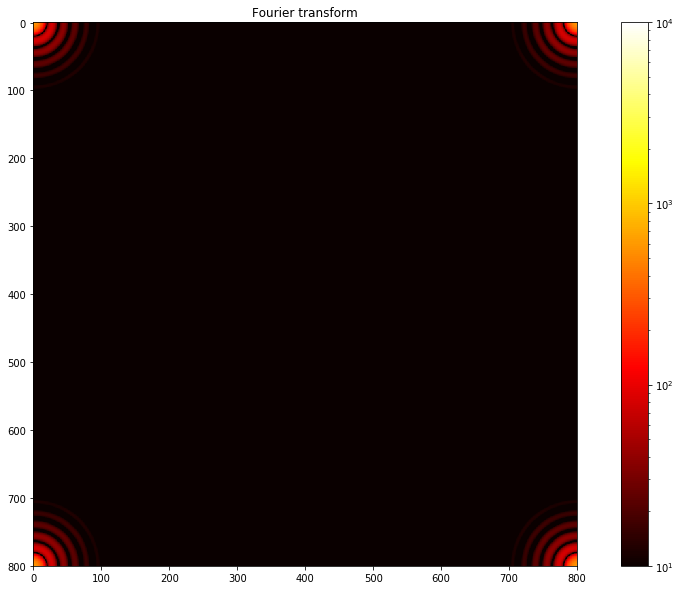

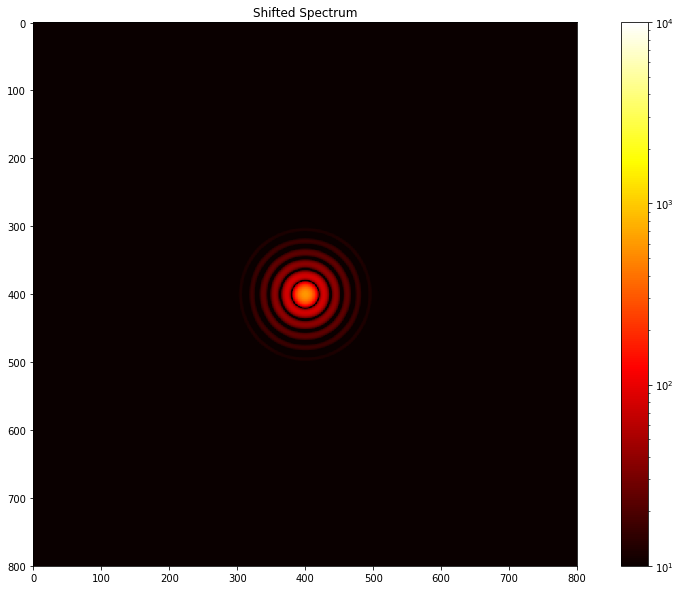

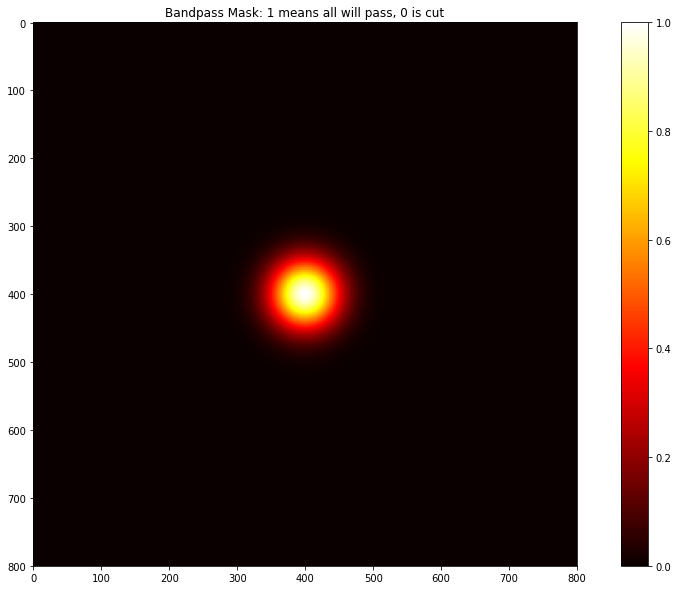

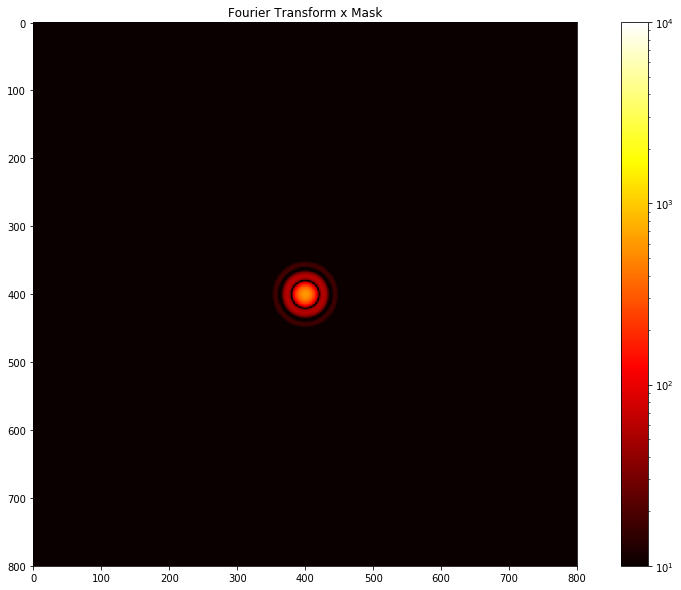

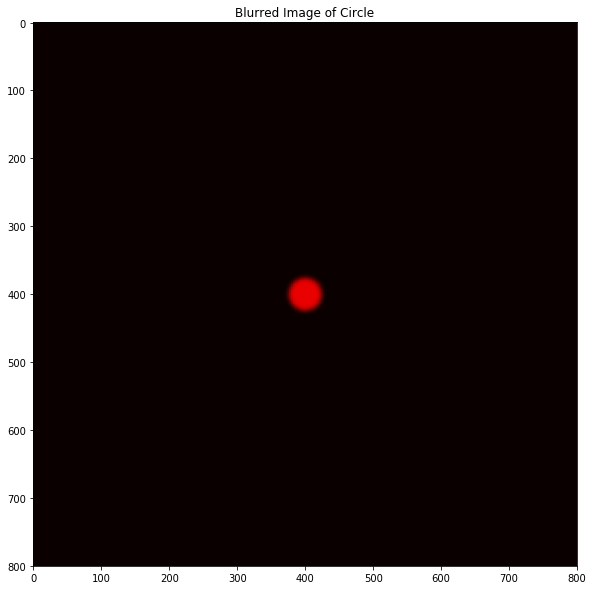

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import fftpack
from matplotlib.colors import LogNorm


"""
This section of the code converts the image specified
to a numpy array.  The mean colour of the image is
found, the image dimensions chosen and a colormap
applied.
"""
colour_image = plt.imread('OneCircle.png').astype(float)
image = np.mean(colour_image[0:800,0:800, 0:3], axis=(2,))
plt.figure(figsize=(16,10))
plt.imshow(image, cmap = 'hot', vmin = 0 , vmax = 1)
plt.title('Original Image of Circle')
plt.show()


"""
This section of the code performs a Fourier Transform
of the image.  I logarithmally scaled the frequencies to
enhance smaller frequencies, giving a more detailed image.
"""
image_fft = np.fft.fft2(image)

plt.figure(figsize=(16,10))
plt.imshow(np.abs(image_fft), cmap = 'hot',
           norm=LogNorm(vmin=10,vmax=10000))
plt.colorbar()
plt.title('Fourier transform')
plt.show()


"""
For ease of readability, the 0 frequency component
is shifted to the centre of the image.
"""
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.figure(figsize=(16,10))                                      
plt.imshow(np.abs(ftimage), cmap = 'hot',
           norm=LogNorm(vmin=10, vmax=10000))
plt.colorbar()
plt.title('Shifted Spectrum')
plt.show()


"""
Here we create a gaussian filter.  This is essentially a 
matrix that convolutes with the frequency values of the
pixels in order to manipulate the image.  Whether that
is sharpening/blurring is determined by the matrix inputs.
"""
sigmax, sigmay = 50, 50

nrows, ncols= 800, 800;
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
mask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))


"""
Here I graph the gaussian mask.
"""
ftimagep = ftimage  * mask;
plt.figure(figsize=(16,10))
plt.imshow(np.abs(mask), cmap ='hot', vmin=0, vmax = 1)
plt.title('Bandpass Mask: 1 means all will pass, 0 is cut')
plt.colorbar()
plt.show()


"""
I apply the mask to the transform, removing lower frequencies.
This removes 'detail' from the image, applying a blurring effect.
"""
plt.figure(figsize=(16,10))
plt.imshow(np.abs(ftimagep), cmap = 'hot',
           norm=LogNorm(vmin=10 , vmax=10000))
plt.title('Fourier Transform x Mask')
plt.colorbar()
plt.show()


"""
I now invert the transform back to image form, with the
lower frequencies removed, the image is blurred.
"""
imagep = np.fft.ifft2(ftimagep)
plt.figure(figsize=(16,10))
plt.imshow(np.abs(imagep), cmap = 'hot', vmin = 0 , vmax=1)
plt.title('Blurred Image of Circle')
plt.show()

